<a href="https://colab.research.google.com/github/Yash-Jumde/Colab-Notebooks/blob/main/Convolutional_NN_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2024-04-17 08:13:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.207, 142.250.136.207, 142.250.148.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  79.6MB/s    in 5.8s    

2024-04-17 08:13:49 (85.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [ ]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
# Get the class names.

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# view a random image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f'Image shape: {img.shape}')

  return img

Image shape: (512, 384, 3)


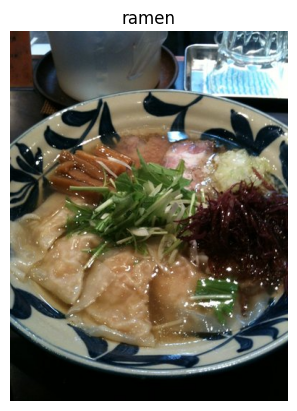

In [ ]:
img = view_random_image(train_dir, target_class=random.choice(class_names))

In [ ]:
# Preprocessing the data.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 37s 133ms/step - loss: 2.1961 - accuracy: 0.1900 - val_loss: 2.0288 - val_accuracy: 0.2728
Epoch 2/5
235/235 [==============================] - 28s 120ms/step - loss: 1.9246 - accuracy: 0.3259 - val_loss: 1.9048 - val_accuracy: 0.3368
Epoch 3/5
235/235 [==============================] - 33s 142ms/step - loss: 1.4913 - accuracy: 0.5015 - val_loss: 2.0475 - val_accuracy: 0.3264
Epoch 4/5
235/235 [==============================] - 28s 119ms/step - loss: 0.7779 - accuracy: 0.7468 - val_loss: 2.7583 - val_accuracy: 0.2800
Epoch 5/5
235/235 [==============================] - 29s 121ms/step - loss: 0.2569 - accuracy: 0.9215 - val_loss: 3.9557 - val_accuracy: 0.2740


In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='trainig_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='trainig_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 12s 147ms/step - loss: 3.9557 - accuracy: 0.2740


[3.9557321071624756, 0.27399998903274536]

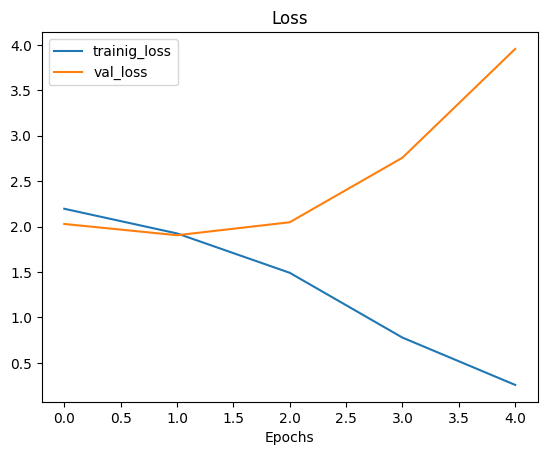

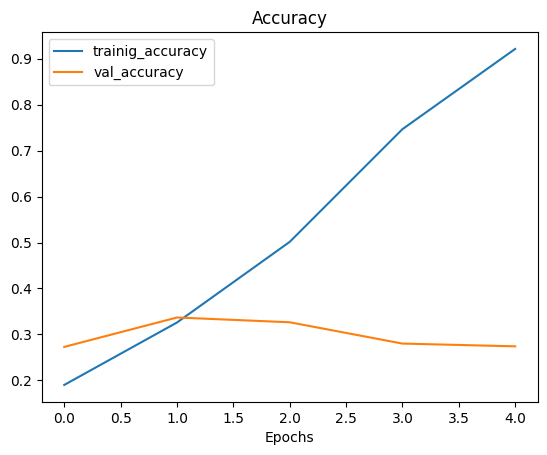

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# as the val_loss keeps increasing, it indicates that the data is being overfitted.

We can improve the performance by:
1. Get more data --> not really helpful here.
2. Simplify the model --> as the model is overfitting, this model may be too complex for our dataset.
3. Using Data augmentation.
4. Using transfer learning.

In [ ]:
# Trying a simplified model
model_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 39s 159ms/step - loss: 2.1279 - accuracy: 0.2419 - val_loss: 1.9321 - val_accuracy: 0.3216
Epoch 2/5
235/235 [==============================] - 27s 116ms/step - loss: 1.7932 - accuracy: 0.3895 - val_loss: 1.9590 - val_accuracy: 0.3168
Epoch 3/5
235/235 [==============================] - 30s 129ms/step - loss: 1.4835 - accuracy: 0.5101 - val_loss: 2.0170 - val_accuracy: 0.3124
Epoch 4/5
235/235 [==============================] - 28s 119ms/step - loss: 1.0460 - accuracy: 0.6685 - val_loss: 2.2394 - val_accuracy: 0.3000
Epoch 5/5
235/235 [==============================] - 28s 117ms/step - loss: 0.6001 - accuracy: 0.8212 - val_loss: 2.6504 - val_accuracy: 0.2988


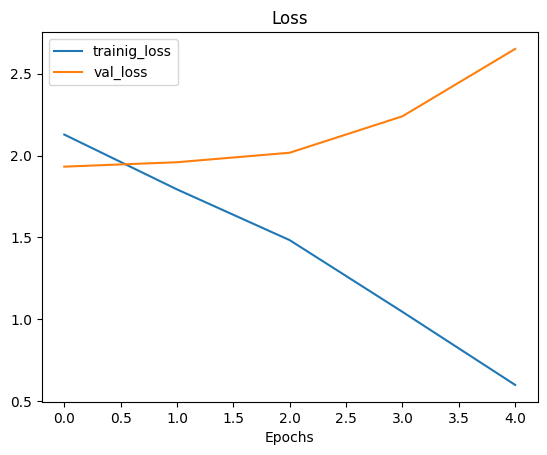

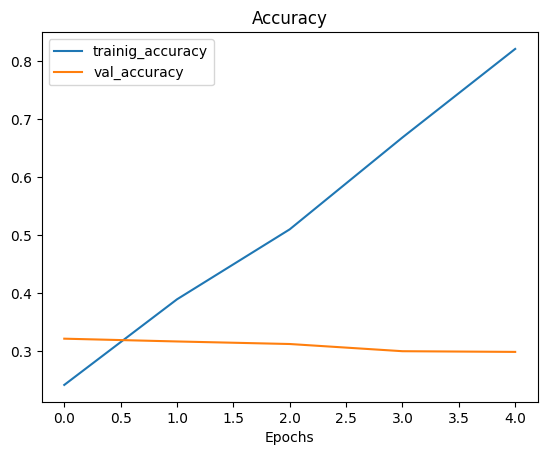

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# The simplified model is still overfitting the data

In [ ]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=20,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='categorical')

Found 7500 images belonging to 10 classes.


We can directly clone a model using the:
tensorflow.keras.models.clone_model() function.

In [ ]:
model_3 = tf.keras.models.clone_model(model_2)

model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 124s 521ms/step - loss: 2.2087 - accuracy: 0.1827 - val_loss: 2.0354 - val_accuracy: 0.2964
Epoch 2/5
235/235 [==============================] - 115s 490ms/step - loss: 2.0806 - accuracy: 0.2667 - val_loss: 1.9826 - val_accuracy: 0.2908
Epoch 3/5
235/235 [==============================] - 109s 462ms/step - loss: 2.0419 - accuracy: 0.2805 - val_loss: 1.9053 - val_accuracy: 0.3236
Epoch 4/5
235/235 [==============================] - 163s 694ms/step - loss: 2.0160 - accuracy: 0.2948 - val_loss: 1.9236 - val_accuracy: 0.3188
Epoch 5/5
235/235 [==============================] - 120s 509ms/step - loss: 1.9695 - accuracy: 0.3187 - val_loss: 1.8064 - val_accuracy: 0.3864


We can imporve the loading time by using:
1. tf.keras.layers.RandomFlip --> data augmentaion is inserted as a layer directly into the model.
2. we can also use the newer API:
tf.keras.utils.image_dataset_from_directory

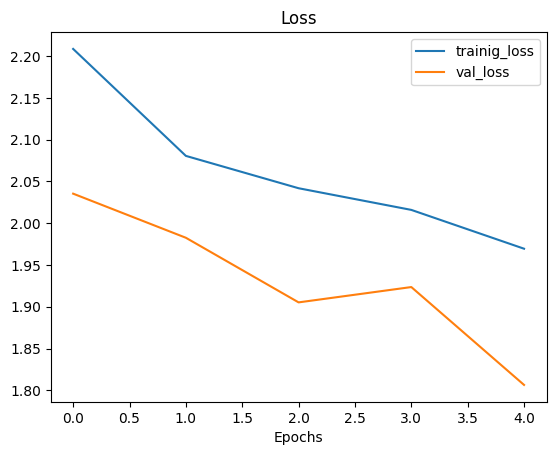

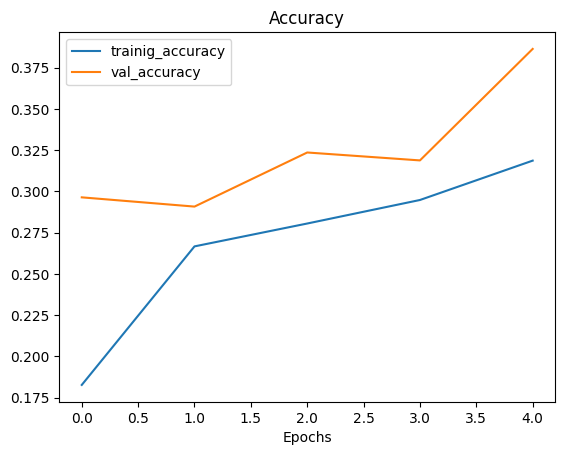

In [ ]:
plot_loss_curves(history_3)

The model is doing better on the validation data this time.


In [ ]:
def load_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  img = load_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred.argmax()]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 18ms/step


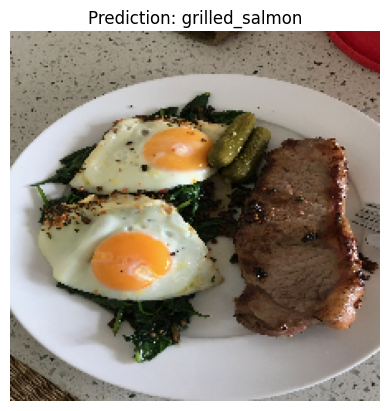

In [ ]:
pred_and_plot(model_3, '03-steak.jpeg', class_names)

1/1 [==============================] - 0s 17ms/step


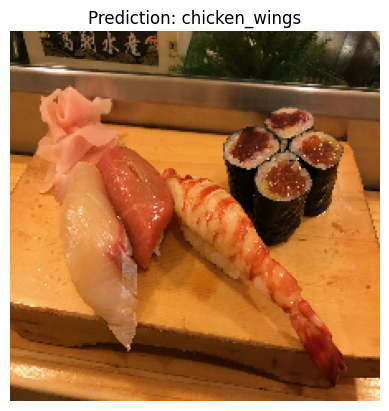

In [ ]:
pred_and_plot(model_3, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 45ms/step


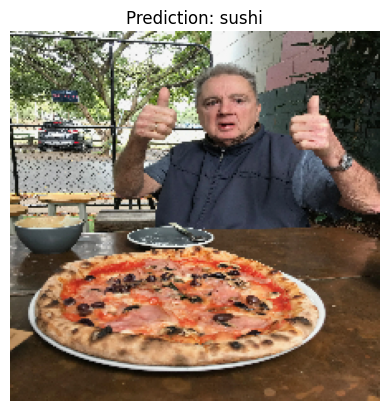

In [ ]:
pred_and_plot(model_3, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 18ms/step


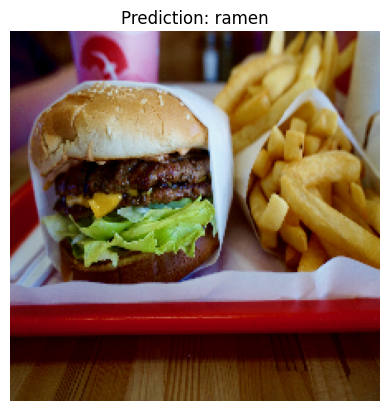

In [ ]:
pred_and_plot(model_3, "03-hamburger.jpeg", class_names)

In [ ]:
# As we can see the model isn't good at all.

In [ ]:
# Save the model anyway.
model_3.save('saved_trained_model')